<a href="https://colab.research.google.com/github/abishekraja018/SDC-GENAI/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 52ms/step - accuracy: 0.8450 - loss: 0.4936 - val_accuracy: 0.9855 - val_loss: 0.0500
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.9780 - loss: 0.0722 - val_accuracy: 0.9890 - val_loss: 0.0419
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.9851 - loss: 0.0471 - val_accuracy: 0.9905 - val_loss: 0.0347
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9894 - loss: 0.0361 - val_accuracy: 0.9898 - val_loss: 0.0340
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9906 - loss: 0.0301 - val_accuracy: 0.9908 - val_loss: 0.0340
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9851 - loss: 0.0421

Test Accuracy: 0.9889000058174133


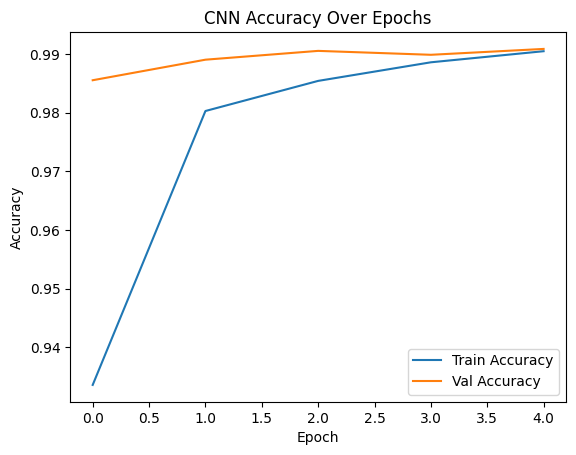

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


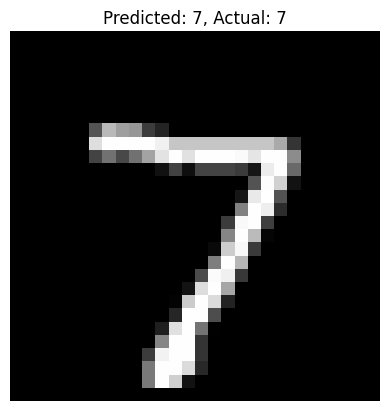

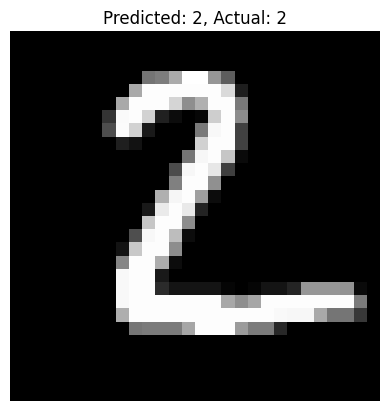

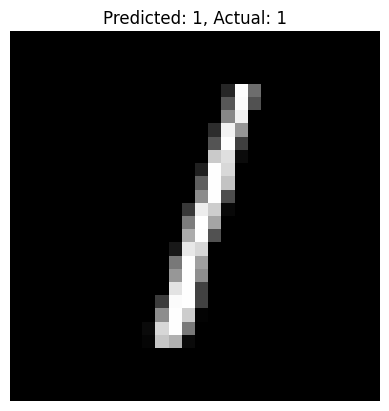

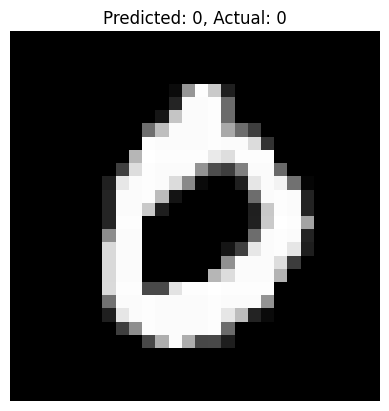

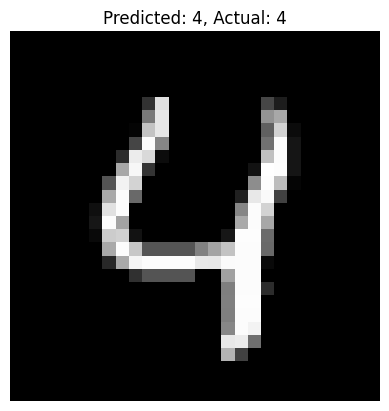

In [1]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 2: Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to (28, 28, 1) and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Step 3: Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=64,
                    validation_split=0.1, verbose=1)

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print("\nTest Accuracy:", test_acc)

# Step 7: Plot accuracy history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("CNN Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Optional: Predict and visualize a few digits
import numpy as np
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()